In [1]:
import numpy as np

In [2]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [34]:
def DetectOutlier(df,var):    
# IQR method is used to deal with outliers
 Q1 = df[var].quantile(0.25)
 Q3 = df[var].quantile(0.75)
 IQR = Q3 - Q1
 high, low = Q3+1.5*IQR, Q1-1.5*IQR
 print("Highest allowed in variable:", var, high)
 print("lowest allowed in variable:", var, low)
 count = df[(df[var] > high) | (df[var] < low)][var].count()
 print('Total outliers in:',var,':',count)
 # new dataframe is created which contains outliers
 df1 = df[((df[var] < low) | (df[var] > high))]  #these are outliers
 print('Outliers : \n', len(df1))
 print(df1.T)
 df = df[((df[var] >= low) & (df[var] <= high))]  #now filter out data which is not outlier
 return(df)

In [35]:
df = pd.read_csv('academic.csv')

In [36]:
 print('Information of Dataset:\n', df.info)
 print('Shape of Dataset (row x column): ', df.shape)
 print('Columns Name: ', df.columns)
 print('Total elements in dataset:', df.size)
 print('Datatype of attributes (columns):', df.dtypes)
 print('First 5 rows:\n', df.head().T)
 print('Last 5 rows:\n',df.tail().T)
 print('Any 5 rows:\n',df.sample(5).T)

Information of Dataset:
 <bound method DataFrame.info of     gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
0           IT        F

In [37]:
 print('Statistical information of Numerical Columns: \n',df.describe())

Statistical information of Numerical Columns: 
        raisedhands  VisITedResources  AnnouncementsView  Discussion
count   478.000000        480.000000         480.000000  480.000000
mean     46.939331         54.797917          37.918750   43.283333
std      31.375699         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.000000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     170.000000         99.000000          98.000000   99.000000


In [38]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

In [39]:
df['raisedhands'].fillna(df['raisedhands'].mean(), inplace=True)

In [40]:
df['gender'].isna().sum()

0

In [41]:
df['raisedhands'].isna().sum()

0

In [42]:
 df['Relation']=df['Relation'].astype('category')

In [43]:
 df['Relation'].dtypes

CategoricalDtype(categories=['Father', 'Mum'], ordered=False, categories_dtype=object)

In [44]:
 df['Relation']=df['Relation'].cat.codes

In [45]:
 df['Relation'].dtypes

dtype('int8')

In [46]:
df['Relation']

0      0
1      0
2      0
3      0
4      0
      ..
475    0
476    0
477    0
478    0
479    0
Name: Relation, Length: 480, dtype: int8

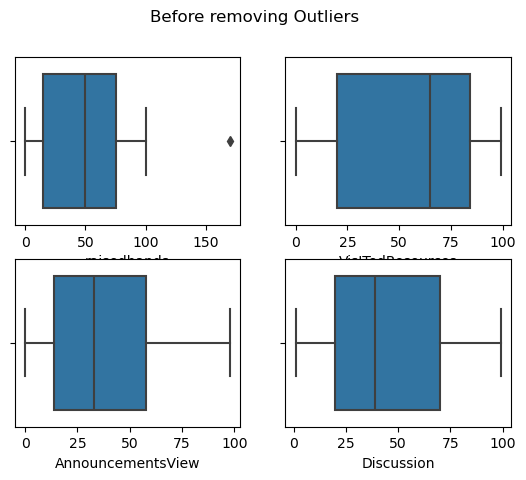

In [52]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Before removing Outliers')
sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
plt.show()

In [53]:
df = DetectOutlier(df,'raisedhands')

Highest allowed in variable: raisedhands 165.0
lowest allowed in variable: raisedhands -75.0
Total outliers in: raisedhands : 1
Outliers : 
 1
                                    28
gender                               M
NationalITy                         KW
PlaceofBirth                    KuwaIT
StageID                   MiddleSchool
GradeID                           G-08
SectionID                            A
Topic                          Science
Semester                             F
Relation                             0
raisedhands                      170.0
VisITedResources                    85
AnnouncementsView                   52
Discussion                          43
ParentAnsweringSurvey              Yes
ParentschoolSatisfaction          Good
StudentAbsenceDays             Under-7
Class                                M


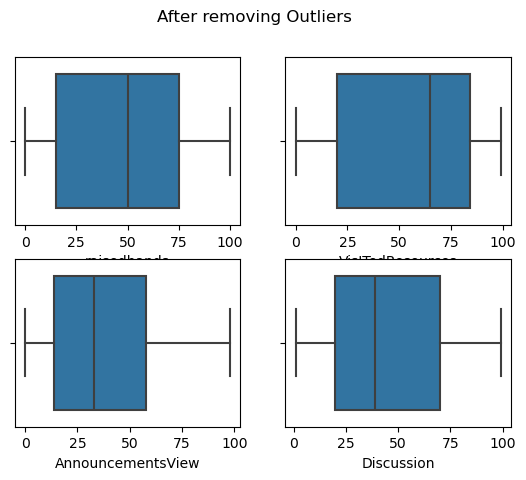

In [54]:
fig, axes = plt.subplots(2,2)
fig.suptitle('After removing Outliers')
sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
plt.show()

In [56]:
print('raisedhands: ', df['raisedhands'].skew())
print('VisITedResources: ', df['VisITedResources'].skew())

raisedhands:  0.028374079559687623
VisITedResources:  -0.3388404568312024


In [57]:
print('AnnouncementsView: ', df['AnnouncementsView'].skew())
print('Discussion: ', df['Discussion'].skew())

AnnouncementsView:  0.4021955128761278
Discussion:  0.3621541732143617


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='VisITedResources', ylabel='Count'>

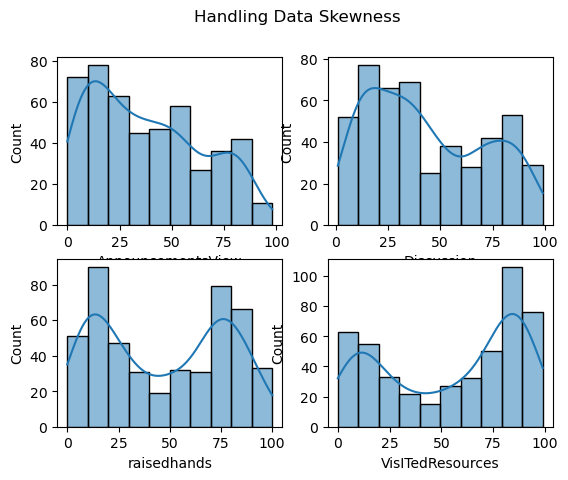

In [60]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Handling Data Skewness')
sns.histplot(ax = axes[0,0], data = df['AnnouncementsView'], kde=True)
sns.histplot(ax = axes[0,1], data = df['Discussion'], kde=True)
sns.histplot(ax = axes[1,0], data = df['raisedhands'], kde=True)
sns.histplot(ax = axes[1,1], data = df['VisITedResources'], kde=True)

In [61]:
from sklearn.preprocessing import PowerTransformer

In [65]:
yeojohnTr = PowerTransformer(standardize=True)  
df['AnnouncementsView'] = yeojohnTr.fit_transform(df['AnnouncementsView'].values.reshape(-1,1))
df['Discussion'] = yeojohnTr.fit_transform(df['Discussion'].values.reshape(-1,1))

C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_16228\3514820672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AnnouncementsView'] = yeojohnTr.fit_transform(df['AnnouncementsView'].values.reshape(-1,1))
C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_16228\3514820672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discussion'] = yeojohnTr.fit_transform(df['Discussion'].values.reshape(-1,1))


In [67]:
print('AnnouncementsView: ', df['AnnouncementsView'].skew())
print('Discussion: ', df['Discussion'].skew())

AnnouncementsView:  -0.032492287034848
Discussion:  -0.0388612149117346


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


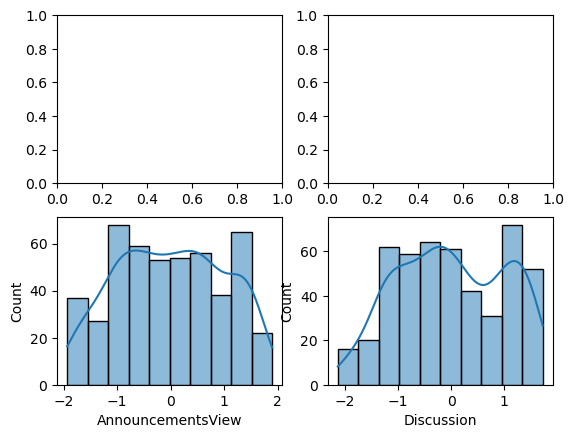

In [80]:
fig, axes = plt.subplots(2,2)
sns.histplot(ax = axes[1,0], data = df['AnnouncementsView'], kde=True)
sns.histplot(ax = axes[1,1], data = df['Discussion'], kde=True)
plt.show()